In [1]:
import pandas as pd

# Carga de datos
En primer lugar, cargamos el conjunto de datos como un *dataframe* de pandas.

In [2]:
df = pd.read_csv('../refugiados.csv')
df.head()

,start,end,day_count
0,2022-04-12T00:00:00.000Z,2022-04-13T00:00:00.000Z,9540
1,2022-04-13T00:00:00.000Z,2022-04-14T00:00:00.000Z,8164
2,2022-04-14T00:00:00.000Z,2022-04-15T00:00:00.000Z,5552
3,2022-04-15T00:00:00.000Z,2022-04-16T00:00:00.000Z,5320
4,2022-04-16T00:00:00.000Z,2022-04-17T00:00:00.000Z,8376


Ahora convertimos el *dataframe* en una serie temporal. Esto se puede hacer en tres pasos:

- convertir el campo *start* a un *datetime*
- establecer la columna de fecha como índice de la serie temporal
- asignar la columna de valores (*day_count*) a una nueva variable, llamada ts.

In [3]:
df['start'] = pd.to_datetime(df['start'])
df.set_index(df['start'], inplace = True)
ts = df['day_count']

Graficamos la serie de tiempo. 

In /home/emanuele/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/emanuele/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/emanuele/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/emanuele/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/emanuele/.local/lib/python3.6/site-packages/matplotlib/

<AxesSubplot:xlabel='start'>

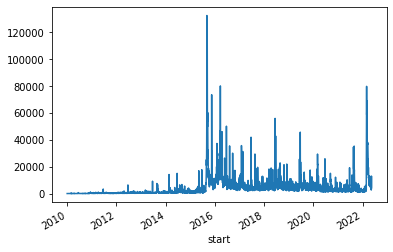

In [5]:
ts.plot()

Mirando el gráfico, decidimos buscar 3 rupturas. Podemos probar con más puntos de rupturas y ver cuánto de estable es el resultado

In [64]:
n_breaks = 3

Preparamos los datos para ser dados como entrada de la biblioteca *ruptures*. Conviertimos la serie temporal en un vector de *numpy*.

In [59]:
import numpy as np
y = np.array(ts.tolist())

Usamos la librería de detección de puntos de ruptura *ruptures*, la cual se puede instalar a través del comando 
`pip install ruptures`.

In [60]:
import ruptures as rpt

*ruptures* ofrece seis modelos diferentes para detectar puntos de ruptura: Dynp, KernelCPD, Pelt, Binseg, BottomUp, Window. Cada modelo debe construirse, entrenarse (a través de la función fit()) y luego usarse para la predicción. La función predict() recibe como entrada el número de puntos de ruptura (menos 1) a identificar. Aquí explotamos el modelo Dynp, que corresponde al de Programación Dinámica.

In [71]:
model = rpt.Dynp(model="l1")
model.fit(y)
breaks = model.predict(n_bkps=n_breaks-1)

Dado que *ruptures* devuelve el índice en el que ocurre el cambio estructural, recuperamos la fecha de la serie orignal original ts.

In [75]:
breaks_rpt = []
for i in breaks:
    breaks_rpt.append(ts.index[i-1])
breaks_rpt = pd.to_datetime(breaks_rpt)
breaks_rpt

DatetimeIndex(['2016-07-30 00:00:00+00:00', '2015-07-29 00:00:00+00:00',
               '2010-01-20 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq=None)

Ahora graficamos los resultados aprovechando la librería *matplotlib*.

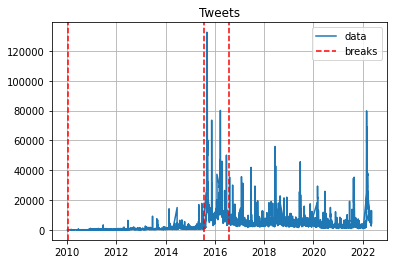

In [73]:
import matplotlib.pyplot as plt
plt.plot(ts, label='data')
plt.title('Tweets')
print_legend = True
for i in breaks_rpt:
    if print_legend:
        plt.axvline(i, color='red',linestyle='dashed', label='breaks')
        print_legend = False
    else:
        plt.axvline(i, color='red',linestyle='dashed')
plt.grid()
plt.legend()
plt.show()

También aplicamos el modelo Pelt para comprobar la consistencia de los resultados.

In [79]:
model = rpt.Pelt(model="l1")
model.fit(y)
breaks = model.predict(pen=1000000)

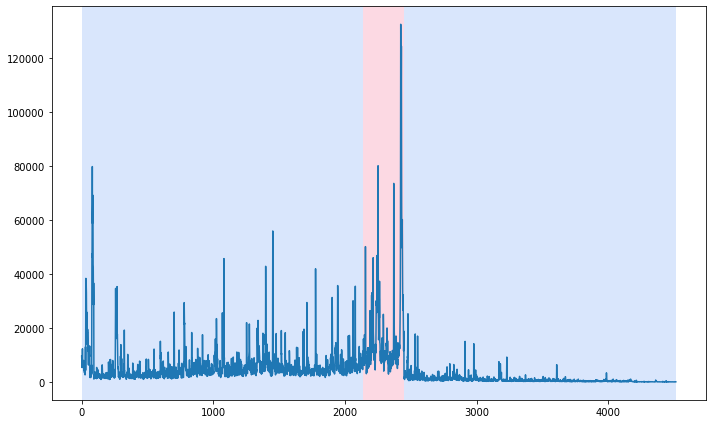

In [80]:
fig, ax_arr = rpt.display(ts,breaks, figsize=(10, 6))
plt.show()